In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt      # Basic plotting
import seaborn as sns               # Advanced visualization (heatmaps, distributions)
import plotly.express as px         # Interactive visualizations (optional)


In [5]:
df = pd.read_csv('Fraud.csv')

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.shape

(6362620, 11)

In [9]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [10]:
#Explore transaction type
df.type.value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [11]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [12]:
print(df.dtypes)


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [13]:
#Checking which recipients stand out

df.nameDest.unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'C1850423904',
       'C1881841831', 'C2080388513'], dtype=object)

In [14]:
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2,
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
df["isFraud"] = df["isFraud"].map({0: "No Fraud", 1: "Fraud"})
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


In [15]:
#Investigating to check unique customers
df.nameOrig.unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1162922333',
       'C1685995037', 'C1280323807'], dtype=object)

In [14]:
#investigating to see how many times a customer started a transaction
df.nameOrig.value_counts()

,count
nameOrig,
C1530544995,3
C545315117,3
C724452879,3
C1784010646,3
C1677795071,3
...,...
C1567523029,1
C644777639,1
C1256645416,1


In [16]:
#How many times a recipient got a transaction
df.nameDest.value_counts()

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
...,...
M367627425,1
M1902904124,1
M242332837,1


In [17]:
df.amount.max()

92445516.64

In [18]:
type = df["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(df,
             values=quantity,
             names=transactions,hole = 0.5,
             title="Distribution of Transaction Type")
figure.show()

In [19]:
#Investigating the top customers and the type of transactions they initiated
top_ten = df.groupby('nameOrig').type.sum().sort_values(ascending=False)[:10]
top_ten

,type
nameOrig,
C466366148,9
C1462946854,9
C2053278656,9
C1698329792,9
C1810482728,9
C288933460,9
C627532861,8
C1435918602,8
C813633808,8


In [20]:
#Checking the average amounttransacted
df['amount'].mean()

np.float64(179861.90354913071)

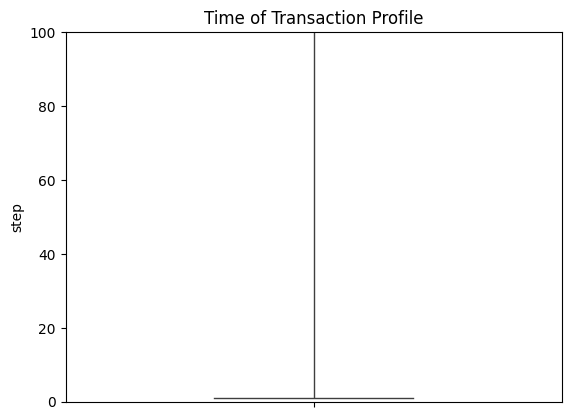

In [21]:
sns.boxplot(y=df.step)
plt.title('Time of Transaction Profile')
plt.ylim(0,100)
plt.show()

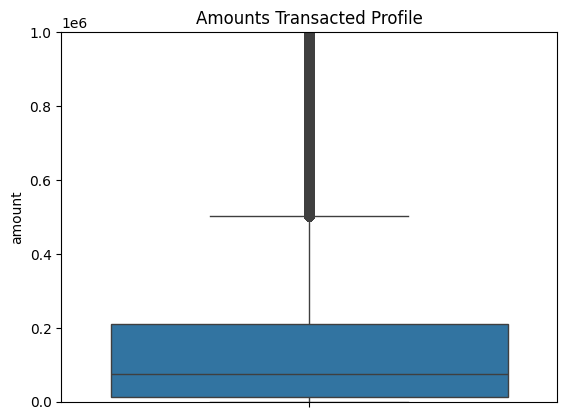

In [22]:
sns.boxplot(y=df.amount)
plt.title('Amounts Transacted Profile')
plt.ylim(0,1000000)
plt.show()

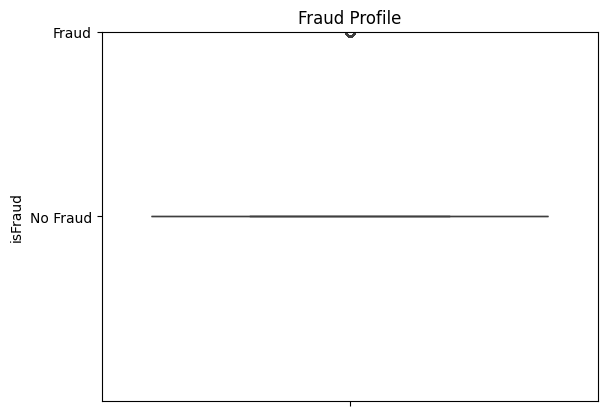

In [23]:
sns.boxplot(y=df.isFraud)
plt.title('Fraud Profile')
plt.ylim(-1,1)
plt.show()

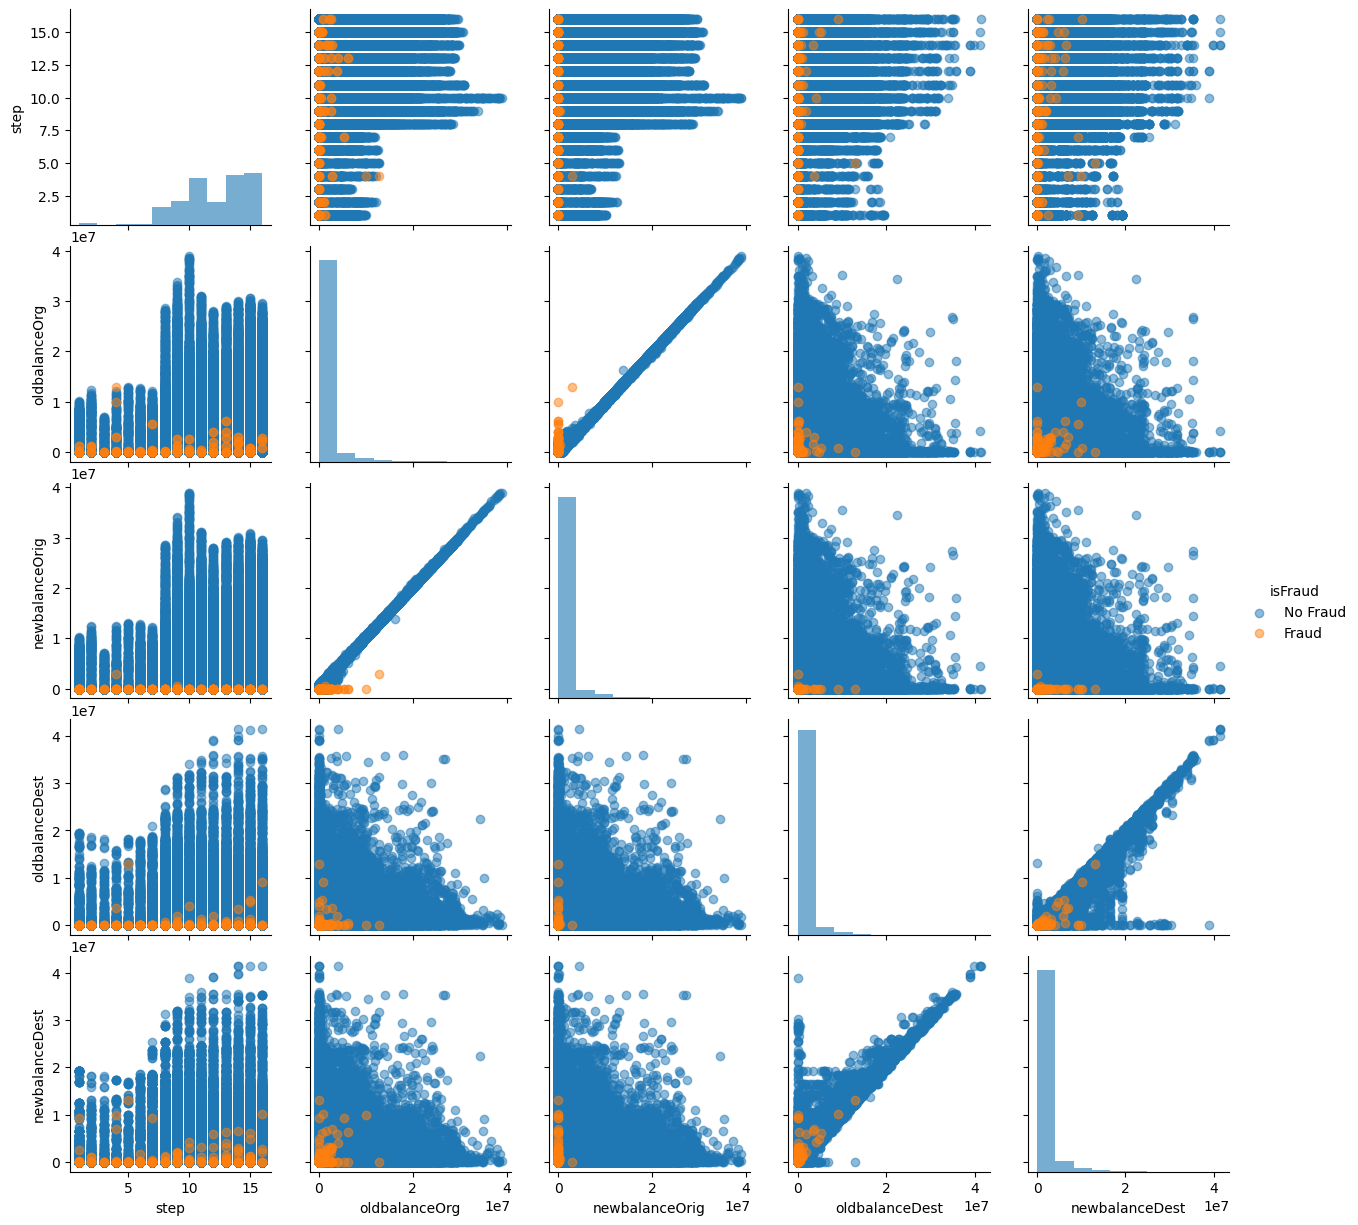

In [22]:
#Visualising the spread of fraud variables across the dataset

Online_Payment_layout = sns.PairGrid(df, vars = ['step', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], hue = 'isFraud')

Online_Payment_layout.map_diag(plt.hist, alpha = 0.6)
Online_Payment_layout.map_offdiag(plt.scatter, alpha = 0.5)
Online_Payment_layout.add_legend()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



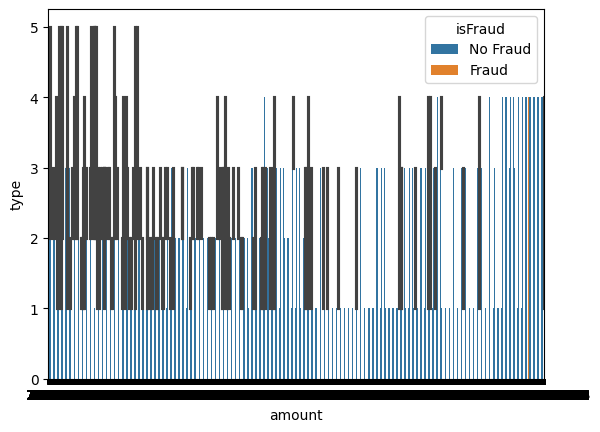

In [25]:
df = df.sample(n=100000, random_state=42)  # or smaller
sns.barplot(x='amount', y='type', hue='isFraud', data=df)
plt.show()


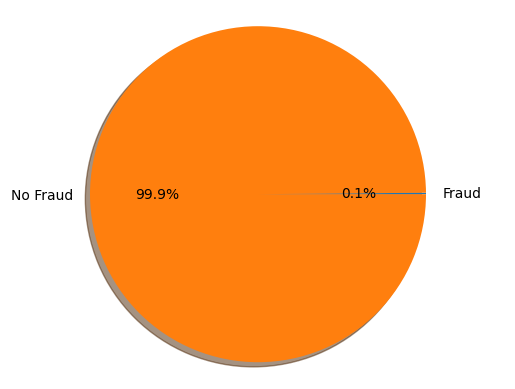

In [38]:
# Fraud Distribution

labels = df['isFraud'].astype('category').cat.categories.tolist()
counts = df['isFraud'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [39]:
df['isFraud'] = df['isFraud'].map({'No Fraud': 0, 'Fraud': 1})


In [40]:
df['isFraud'] = df['isFraud'].astype(int)


In [47]:
Fraudulent_Transaction = df[df.isFraud == 1]
Not_Fraudulent_Transaction = df[df.isFraud == 0]

print('Fraudulent Transaction: {}'.format(len(Fraudulent_Transaction)))
print('Not Fraudulent Transaction: {}'.format(len(Not_Fraudulent_Transaction)))


Fraudulent Transaction: 141
Not Fraudulent Transaction: 99859


In [48]:
print(df['isFraud'].unique())


[0 1]


In [49]:
print("Fraudulent Transaction Stats:")
print(Fraudulent_Transaction.describe())

print("\nNot Fraudulent Transaction Stats:")
print(Not_Fraudulent_Transaction.describe())


Fraudulent Transaction Stats:
             step        type        amount  oldbalanceOrg  newbalanceOrig  \
count  141.000000  141.000000  1.410000e+02   1.410000e+02    1.410000e+02   
mean   376.418440    2.680851  1.340223e+06   1.373441e+06    6.835199e+04   
std    219.173387    1.494366  2.142000e+06   2.290413e+06    5.000968e+05   
min      5.000000    1.000000  1.510000e+02   1.510000e+02    0.000000e+00   
25%    194.000000    1.000000  1.150853e+05   1.150853e+05    0.000000e+00   
50%    374.000000    4.000000  5.803871e+05   5.803871e+05    0.000000e+00   
75%    587.000000    4.000000  1.501298e+06   1.501298e+06    0.000000e+00   
max    736.000000    4.000000  1.000000e+07   1.262696e+07    4.953893e+06   

       oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
count    1.410000e+02    1.410000e+02    141.0      141.000000  
mean     3.240251e+05    8.526443e+05      1.0        0.007092  
std      1.055418e+06    1.745977e+06      0.0        0.084215  
min    

In [51]:
df.groupby('isFraud')[df.select_dtypes(include='number').columns].mean()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
isFraud,,,,,,,,,
0,243.521686,2.052524,1.789437e+05,8.359225e+05,859338.713489,1.105294e+06,1.230588e+06,0.0,0.000000
1,376.418440,2.680851,1.340223e+06,1.373441e+06,68351.986596,3.240251e+05,8.526443e+05,1.0,0.007092


In [53]:
df.groupby('isFraud')['amount'].mean()


,amount
isFraud,
0,1.789437e+05
1,1.340223e+06


In [52]:
#Understanding The statistical nature of Non Fraudulent Transactions.

Not_Fraudulent_Transaction.amount.describe()

,amount
count,9.985900e+04
mean,1.789437e+05
std,5.515603e+05
min,9.200000e-01
25%,1.348306e+04
50%,7.586737e+04
75%,2.087527e+05
max,3.697390e+07


In [43]:
#Understanding The statistical nature of Fraudulent Transactions.

Fraudulent_Transaction.amount.describe()

,amount
count,1.410000e+02
mean,1.340223e+06
std,2.142000e+06
min,1.510000e+02
25%,1.150853e+05
50%,5.803871e+05
75%,1.501298e+06
max,1.000000e+07


In [45]:
df.dtypes


,0
step,int64
type,int64
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


In [55]:
Non_Fraudulent_Sample = Not_Fraudulent_Transaction.sample(n=1142)

In [56]:
new_dataset = pd.concat([Non_Fraudulent_Sample, Fraudulent_Transaction], axis=0)

In [57]:
new_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1361083,138,1,288670.72,C705478184,0.00,0.00,C840394202,2390439.97,2679110.69,0,0
3774532,280,2,7645.53,C1807943422,33509.37,25863.83,M2087093762,0.00,0.00,0,0
3874397,283,1,61991.44,C613919110,63563.00,1571.56,C1678069897,17794.40,79785.84,0,0
1387131,139,3,148464.82,C1427641770,4278123.36,4426588.18,C698851661,226086.77,117820.88,0,0
3570688,260,2,439.65,C2145176650,0.00,0.00,M2000372955,0.00,0.00,0,0


In [58]:
new_dataset.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
896003,42,4,506867.52,C1345605199,506867.52,0.0,C759668657,0.00,0.00,1,0
5323782,374,1,7466.12,C1178286288,7466.12,0.0,C626411479,0.00,7466.12,1,0
4785639,340,1,4896179.38,C1971684490,4896179.38,0.0,C497024597,462959.29,5359138.67,1,0
6262607,612,4,125216.91,C1019916893,125216.91,0.0,C1183977547,0.00,0.00,1,0
5956511,405,4,70382.18,C809677827,70382.18,0.0,C87092424,0.00,0.00,1,0


In [59]:
new_dataset['isFraud'].value_counts()

,count
isFraud,
0,1142
1,141


In [60]:
new_dataset.shape

(1283, 11)

In [67]:
# One-hot Encoding.
#Importing library
#To train and test our machine learning model, we select features (columns) from our dataset
#Because our dataset contains categorial values ('nameOrig', 'nameDest'). it becomes necessary to convert them into binary format which can be readily used by or Machine learning model.

from sklearn.preprocessing import OneHotEncoder

In [66]:


encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop=None)


In [69]:
#perform one-hot encoding on 'type' column
encoder_df =  pd.get_dummies(new_dataset, columns=['type','nameOrig','nameDest'], prefix=['type','nameOrig','nameDest'])

In [70]:
encoder_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_1,type_2,...,nameDest_M934352684,nameDest_M936878098,nameDest_M946473414,nameDest_M952115217,nameDest_M956017283,nameDest_M957222488,nameDest_M957487162,nameDest_M96384758,nameDest_M964614212,nameDest_M999502721
1361083,138,288670.72,0.00,0.00,2390439.97,2679110.69,0,0,True,False,...,False,False,False,False,False,False,False,False,False,False
3774532,280,7645.53,33509.37,25863.83,0.00,0.00,0,0,False,True,...,False,False,False,False,False,False,False,False,False,False
3874397,283,61991.44,63563.00,1571.56,17794.40,79785.84,0,0,True,False,...,False,False,False,False,False,False,False,False,False,False
1387131,139,148464.82,4278123.36,4426588.18,226086.77,117820.88,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3570688,260,439.65,0.00,0.00,0.00,0.00,0,0,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896003,42,506867.52,506867.52,0.00,0.00,0.00,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False
5323782,374,7466.12,7466.12,0.00,0.00,7466.12,1,0,True,False,...,False,False,False,False,False,False,False,False,False,False
4785639,340,4896179.38,4896179.38,0.00,462959.29,5359138.67,1,0,True,False,...,False,False,False,False,False,False,False,False,False,False
6262607,612,125216.91,125216.91,0.00,0.00,0.00,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
encoder_df.shape

(1283, 2578)

In [72]:
# Check result of one-hot encoding
encoder_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_1,type_2,...,nameDest_M934352684,nameDest_M936878098,nameDest_M946473414,nameDest_M952115217,nameDest_M956017283,nameDest_M957222488,nameDest_M957487162,nameDest_M96384758,nameDest_M964614212,nameDest_M999502721
1361083,138,288670.72,0.00,0.00,2390439.97,2679110.69,0,0,True,False,...,False,False,False,False,False,False,False,False,False,False
3774532,280,7645.53,33509.37,25863.83,0.00,0.00,0,0,False,True,...,False,False,False,False,False,False,False,False,False,False
3874397,283,61991.44,63563.00,1571.56,17794.40,79785.84,0,0,True,False,...,False,False,False,False,False,False,False,False,False,False
1387131,139,148464.82,4278123.36,4426588.18,226086.77,117820.88,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3570688,260,439.65,0.00,0.00,0.00,0.00,0,0,False,True,...,False,False,False,False,False,False,False,False,False,False


In [73]:
encoder_df.tail()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_1,type_2,...,nameDest_M934352684,nameDest_M936878098,nameDest_M946473414,nameDest_M952115217,nameDest_M956017283,nameDest_M957222488,nameDest_M957487162,nameDest_M96384758,nameDest_M964614212,nameDest_M999502721
896003,42,506867.52,506867.52,0.0,0.00,0.00,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False
5323782,374,7466.12,7466.12,0.0,0.00,7466.12,1,0,True,False,...,False,False,False,False,False,False,False,False,False,False
4785639,340,4896179.38,4896179.38,0.0,462959.29,5359138.67,1,0,True,False,...,False,False,False,False,False,False,False,False,False,False
6262607,612,125216.91,125216.91,0.0,0.00,0.00,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False
5956511,405,70382.18,70382.18,0.0,0.00,0.00,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False


#Target, Feature Split
Target Selection

'isFraud' column selected as Target (Y)

In [74]:
Y = encoder_df['isFraud']

In [75]:
features = encoder_df.drop('isFraud', axis=1)

In [76]:
X = features
Y.head()

,isFraud
1361083,0
3774532,0
3874397,0
1387131,0
3570688,0


In [77]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_1,type_2,type_3,...,nameDest_M934352684,nameDest_M936878098,nameDest_M946473414,nameDest_M952115217,nameDest_M956017283,nameDest_M957222488,nameDest_M957487162,nameDest_M96384758,nameDest_M964614212,nameDest_M999502721
1361083,138,288670.72,0.00,0.00,2390439.97,2679110.69,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3774532,280,7645.53,33509.37,25863.83,0.00,0.00,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3874397,283,61991.44,63563.00,1571.56,17794.40,79785.84,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1387131,139,148464.82,4278123.36,4426588.18,226086.77,117820.88,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3570688,260,439.65,0.00,0.00,0.00,0.00,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [78]:
from sklearn.model_selection import train_test_split

In [79]:
#create X_train, X_test, Y_train, Y_test
# using test_size of 20%

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)

In [80]:
print('\n',X_train.head(2))

print('\n',X_test.head(2))

print('\n',Y_train.head(2))

print('\n',Y_test.head(2))


          step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
4635962   330  124682.74         1094.0            0.00     30337295.52   
726001     37  426075.37        31659.0       457734.37       933518.60   

         newbalanceDest  isFlaggedFraud  type_1  type_2  type_3  ...  \
4635962     30461978.26               0    True   False   False  ...   
726001        507443.23               0   False   False    True  ...   

         nameDest_M934352684  nameDest_M936878098  nameDest_M946473414  \
4635962                False                False                False   
726001                 False                False                False   

         nameDest_M952115217  nameDest_M956017283  nameDest_M957222488  \
4635962                False                False                False   
726001                 False                False                False   

         nameDest_M957487162  nameDest_M96384758  nameDest_M964614212  \
4635962                False        

In [81]:
#Training our Classification Model with a Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

In [82]:
model = LogisticRegression()

In [83]:
#Training model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [84]:
model_pred = model.predict(X_test)

In [85]:
# Obtain model probabilities
probs = model.predict_proba(X_test)

In [86]:
#Logistic Regression Model Evaluation
#importing the methods
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_recall_curve, average_precision_score, roc_auc_score
print('\nClassification Report:')
print(classification_report(Y_test, model_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       229
           1       0.86      0.64      0.73        28

    accuracy                           0.95       257
   macro avg       0.91      0.81      0.85       257
weighted avg       0.95      0.95      0.95       257



In [87]:
# check True Negatives/Positives, False Negatives/Positives
pd.DataFrame(confusion_matrix(Y_test, model_pred),
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'],
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),226,3
Actually Positive(1),10,18


In [88]:
# Print confusion matrix using predictions in context
pd.DataFrame(confusion_matrix(Y_test, model_pred),
             columns=['Predicted Not Fraud(0) ', 'Predicted Fraud(1)'],
             index=['Actually Not Fraud(0)', 'Actually Fraud(1)'])

,Predicted Not Fraud(0),Predicted Fraud(1)
Actually Not Fraud(0),226,3
Actually Fraud(1),10,18


In [90]:
# ACCURACY SCORE
print('Accuracy:',accuracy_score(Y_test, model_pred))

Accuracy: 0.9494163424124513


In [91]:
# Calculate average precision and the P-R curve
average_precision = average_precision_score(Y_test, model_pred)
average_precision

np.float64(0.5899309139998412)

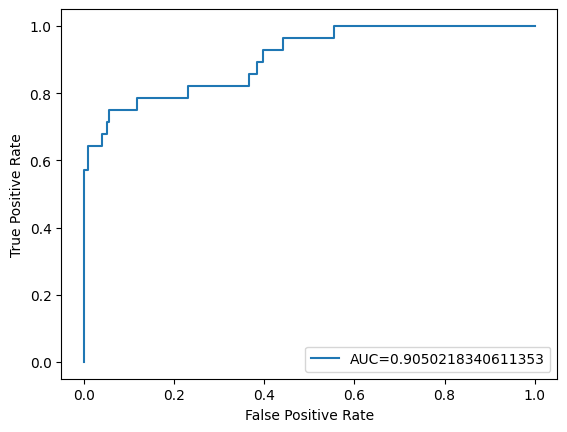

In [92]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [93]:
print('AUC Score:')
print(roc_auc_score(Y_test, probs[:,1]))

AUC Score:
0.9050218340611353


Training with Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier
# Define the model as the random forest
model = RandomForestClassifier(random_state=5, n_estimators=20)
model.fit(X_train,Y_train)
model_pred = model.predict(X_test)
# Obtain model probabilities
probs = model.predict_proba(X_test)

Random Forest Model Evaluation

In [95]:
#importing the methods
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_recall_curve, average_precision_score, roc_auc_score
# Print classification report using predictions
print('Classification_Report:\n',classification_report(Y_test, model_pred))

Classification_Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       229
           1       0.95      0.75      0.84        28

    accuracy                           0.97       257
   macro avg       0.96      0.87      0.91       257
weighted avg       0.97      0.97      0.97       257



In [96]:
 #Print confusion matrix using predictions
pd.DataFrame(confusion_matrix(Y_test, model_pred),
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'],
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),228,1
Actually Positive(1),7,21


In [97]:
# Print confusion matrix using predictions in Context
pd.DataFrame(confusion_matrix(Y_test, model_pred),
             columns=['Predicted Not Fraud(0) ', 'Predicted Fraud(1)'],
             index=['Actually Not Fraud(0)', 'Actually Fraud(1)'])

,Predicted Not Fraud(0),Predicted Fraud(1)
Actually Not Fraud(0),228,1
Actually Fraud(1),7,21


In [98]:
# ACCURACY SCORE
print('Accuracy:',accuracy_score(Y_test, model_pred))

Accuracy: 0.9688715953307393


In [99]:
# Calculate average precision and the P-R curve
average_precision = average_precision_score(Y_test, model_pred)
average_precision

np.float64(0.7431464449946941)

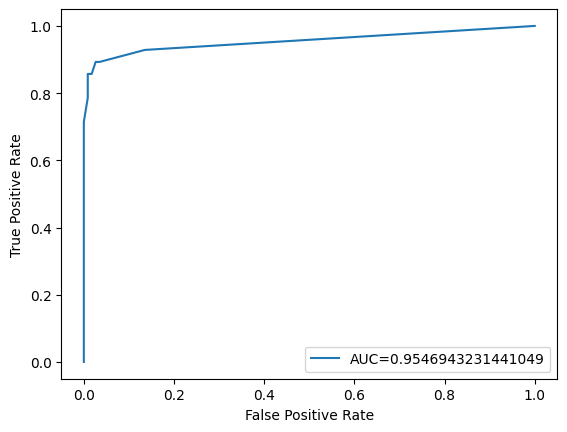

In [100]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [101]:
# Print ROC_AUC score using probabilities
print('AUC Score:')
print(roc_auc_score(Y_test, probs[:, 1]))

AUC Score:
0.9546943231441049
